In [16]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from Training import model, utils, dataset, train
import numpy as np
from sklearn import preprocessing
from IPython.display import HTML
from matplotlib import animation
from mpl_toolkits.mplot3d import axes3d

Load Models and Data

In [2]:
test_model = model.CSGainAndBandwidthManually()
test_model2 = model.Model500()
deep_model = model.deepModel()
# load data
data = np.array(utils.parseGainAndBWCsv('Data/BW_Gain2.0.csv')).astype(float)


In [5]:
print(data.shape)
print(data)

(668, 2, 2)
[[[ 1.000e-06  1.590e+03]
  [ 3.022e+00  9.660e+10]]

 [[ 1.000e-06  1.640e+03]
  [ 3.231e+00  9.330e+10]]

 [[ 1.000e-06  1.680e+03]
  [ 3.433e+00  9.030e+10]]

 ...

 [[ 1.000e-05  8.954e+02]
  [ 5.210e-01  6.070e+10]]

 [[ 1.000e-05  9.417e+02]
  [-8.350e-01  7.100e+10]]

 [[ 1.000e-05  9.881e+02]
  [-2.015e+00  8.400e+10]]]


Normalize data

In [6]:
data = data.reshape(data.shape[0],4)
feature = data.T[0]

# ensure norm and denorm work 
norm, data_min, data_max = normalize(feature)
feature_1 = utils.denormalize(norm, data_min, data_max)


min_max = dict()
for i in range(4):
    feature = data.T[i]
    norm_feature, data_min, data_max = utils.normalize(feature)
    data.T[i] = norm_feature
    min_max[i] = [data_min, data_max]
data = data.reshape(data.shape[0],2,2)

[[ 1.000e-06  1.590e+03  3.022e+00  9.660e+10]
 [ 1.000e-06  1.640e+03  3.231e+00  9.330e+10]
 [ 1.000e-06  1.680e+03  3.433e+00  9.030e+10]
 ...
 [ 1.000e-05  8.954e+02  5.210e-01  6.070e+10]
 [ 1.000e-05  9.417e+02 -8.350e-01  7.100e+10]
 [ 1.000e-05  9.881e+02 -2.015e+00  8.400e+10]]


In [7]:
# Create Dataset and split
data_x = data[:, 1]
data_y = data[: ,0]
dataset = dataset.CircuitSynthesisGainAndBandwidthManually(data_x, data_y)
train_dataset, val_dataset = utils.splitDataset(dataset, 0.8)

In [8]:
dtype = torch.FloatTensor
loss_fn = nn.L1Loss().type(dtype)  # loss can be changed here. This is the first one i tried that gave meaningful results
x = optim.Adagrad
model = test_model
optimizer = x(model.parameters(), lr=0.069395)#0.06448295999961791)  # TODO haven't experimented with this yet

train_data = DataLoader(train_dataset, batch_size=32)
validation_data = DataLoader(val_dataset, batch_size=32)

In [9]:
# train nn and check accuracy
acc, preds, idx = train.check_accuracy(model, validation_data, .1)
losses, accs, part_accs = train.trainWValidation(model, train_data, validation_data, loss_fn, optimizer, num_epochs=200, print_every=10)
# TODO accuracy may not be right. this was a quick attempt
#print(losses[-1])
#acc, preds = train.check_accuracy(test_model, validation_data, loss_fn)

t = 10, loss = 0.2128
t = 20, loss = 0.2093
t = 30, loss = 0.2071
t = 40, loss = 0.2064
t = 50, loss = 0.2040
t = 60, loss = 0.2036
t = 70, loss = 0.2031
t = 80, loss = 0.2023
t = 90, loss = 0.1991
t = 100, loss = 0.1983
t = 110, loss = 0.1960
t = 120, loss = 0.1979
t = 130, loss = 0.1952
t = 140, loss = 0.1944
t = 150, loss = 0.1951
t = 160, loss = 0.1923
t = 170, loss = 0.1955
t = 180, loss = 0.1888
t = 190, loss = 0.1901
t = 200, loss = 0.1861


In [10]:
acc, part_acc, preds = train.check_accuracy(model, validation_data, .1)
print(acc)
print()

0.23880597014925373



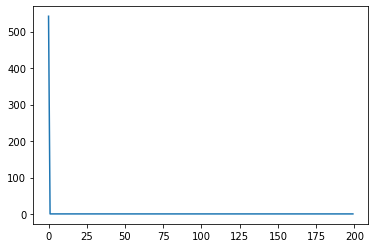

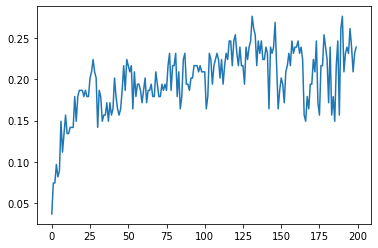

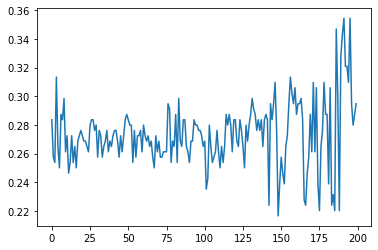

In [11]:
# plot losses per epoch
plt.plot(losses)
plt.show()
plt.plot(accs)
plt.show()
plt.plot(part_accs)
plt.show()

In [ ]:
print(data.shape)


fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = data.T[1,0,:]
xline = data.T[0,1,:]
yline = data.T[0,0,:]
ax.scatter3D(xline, yline, zline,c=zline, cmap = 'RdBu')

def animate(frame):
    ax.view_init(30, frame/4)
    plt.pause(.001)
    return fig

anim = animation.FuncAnimation(fig, animate, frames=500, interval=75)
HTML(anim.to_html5_video())

(668, 2, 2)


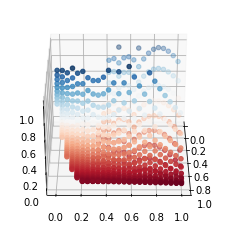

In [ ]:
print(data.shape)


fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = data.T[1,1,:]
xline = data.T[0,1,:]
yline = data.T[0,0,:]
ax.scatter3D(xline, yline, zline,c=zline, cmap = 'RdBu')

def animate(frame):
    ax.view_init(30, frame/4)
    plt.pause(.001)
    return fig

anim = animation.FuncAnimation(fig, animate, frames=500, interval=75)
HTML(anim.to_html5_video())

In [ ]:
#acc, part_accs, preds = train.check_accuracy(test_model, train_data, .10)
preds = np.array(preds)
train_data = np.array(train_dataset)
print(preds.shape)
print(train_data.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = train_data.T[1,0,:]
xline = train_data.T[0,1,:]
yline = train_data.T[0,0,:]
ax.scatter3D(xline, yline, zline,c=zline, cmap = 'RdBu')

def animate(frame):
    ax.view_init(30, frame/4)
    plt.pause(.001)
    return fig

anim = animation.FuncAnimation(fig, animate, frames=500, interval=75)
HTML(anim.to_html5_video())

In [ ]:
preds = np.array(preds)
train_data = np.array(train_dataset)
print(preds.shape)
print(train_data.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = train_data.T[1,1,:]
xline = train_data.T[0,1,:]
yline = train_data.T[0,0,:]
ax.scatter3D(xline, yline, zline,c=zline, cmap = 'RdBu')

def animate(frame):
    ax.view_init(30, frame/4)
    plt.pause(.001)
    return fig

anim = animation.FuncAnimation(fig, animate, frames=500, interval=75)
HTML(anim.to_html5_video())

In [ ]:
preds = np.array(preds)
train_data = np.array(train_dataset)
print(preds.shape)
print(train_data.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = preds.T[0,:]
xline = train_data.T[0,1,:]
yline = train_data.T[0,0,:]
ax.scatter3D(xline, yline, zline,c=zline, cmap = 'RdBu')

def animate(frame):
    ax.view_init(30, frame/4)
    plt.pause(.001)
    return fig

anim = animation.FuncAnimation(fig, animate, frames=500, interval=75)
HTML(anim.to_html5_video())

In [ ]:
preds = np.array(preds)
train_data = np.array(train_dataset)
print(preds.shape)
print(train_data.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = preds.T[1,:]
xline = train_data.T[0,1,:]
yline = train_data.T[0,0,:]
ax.scatter3D(xline, yline, zline,c=zline, cmap = 'RdBu')

def animate(frame):
    ax.view_init(30, frame/4)
    plt.pause(.001)
    return fig

anim = animation.FuncAnimation(fig, animate, frames=500, interval=75)
HTML(anim.to_html5_video())

In [ ]:
# print(np.array(train_dataset).shape)
# data = np.array(train_dataset)
# x = data[:,1,0]
# y = data[:,1,1]

# colors1 = data[:,0,1]

# for i in range(len(colors1)):c
#     colors1[i] = (colors1[i] - colors1.min()) / (colors1.min() - colors1.max())
    
# colors2 = data[:,0,0]
# for i in range(len(colors2)):
#     colors2[i] = (colors2[i] - colors2.min()) / (colors2.min() - colors2.max())
    
# # b_preds = preds.T[0]
# # for i in range(len(b_preds)):
# #     b_preds[i] = (b_preds[i] - b_preds.min()) / (b_preds.min() - colors2.max())

# area = 125*np.ones(x.shape)
# fig = plt.figure(figsize=(12,12))
# plt.scatter(x, y, +c=colors1, vmin = colors1.min(), vmax = colors1.max(), s=area, cmap = plt.cm.get_cmap('RdYlBu'))
# plt.xticks(x)
# plt.yticks(y)
# plt.show()

# fig = plt.figure(figsize=(12,12))
# plt.scatter(x, y, c=colors2, vmin = colors2.min(), vmax = colors2.max(), s=area, cmap = plt.cm.get_cmap('RdYlBu'))
# plt.xticks(x)
# plt.yticks(y)
# plt.show()